In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [ ]:
np.random.seed(123)
x = np.random.normal(0, 1, 50)
y = 2 - 3 * x + np.random.normal(0, 1, len(x))

In [ ]:
plt.scatter(x, y)

In [ ]:
model = sm.OLS(endog=y, exog=sm.add_constant(x)).fit()

In [ ]:
print(model.summary())

In [126]:
df = pd.read_excel("../data/car_sales_train.xlsx")

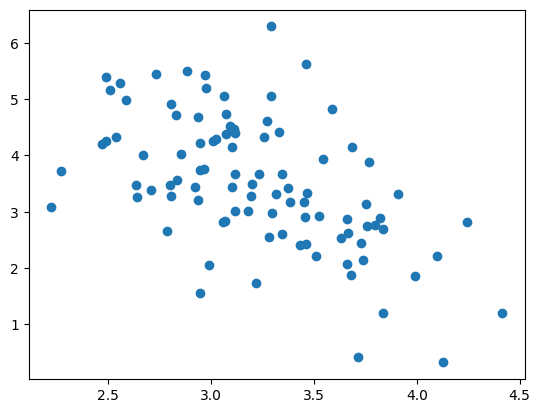

In [127]:
df = df[np.log(df["sales"]) > 0]
plt.scatter(np.log(df["price"]), np.log(df["sales"]))

In [ ]:
plt.scatter(np.log(df["price"]), np.log(df["resale"]))


In [128]:

df_2 = df[df["resale"].notna() & df["price"].notna()]
df_2

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,Acura,TL,39.384,19.875,0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
3,Acura,RL,8.588,29.725,0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
5,Audi,A6,18.780,23.555,0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Mercury,Villager,20.380,14.795,1,22.51,3.3,170.0,112.2,74.9,194.7,3.944,20.0,21.0
92,Mercedes-Benz,C-Class,18.392,26.050,0,31.75,2.3,185.0,105.9,67.7,177.4,3.250,16.4,26.0
93,Mercedes-Benz,E-Class,27.602,41.450,0,49.90,3.2,221.0,111.5,70.8,189.4,3.823,21.1,25.0
94,Mercedes-Benz,S-Class,16.774,50.375,0,69.70,4.3,275.0,121.5,73.1,203.1,4.133,23.2,21.0


In [129]:
model = sm.OLS(np.log(df_2["resale"]), sm.add_constant(np.log(df_2["price"]))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 resale   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     686.3
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           1.05e-40
Time:                        15:27:24   Log-Likelihood:                 35.523
No. Observations:                  81   AIC:                            -67.05
Df Residuals:                      79   BIC:                            -62.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5709      0.128     -4.466      0.0

In [130]:
factor = df["price"][df["resale"].isna() & df["price"].notna()]
predictions = np.exp(model.predict(sm.add_constant(np.log(factor))))
predictions

7     17.789567
18    31.243609
27    12.244786
34    19.306756
44    17.320698
50     7.824734
66    28.824740
72    31.300211
74    41.126784
75    23.075239
78    28.726055
96    26.081456
97    27.557089
98    27.979356
dtype: float64

In [131]:
df["resale"][df["resale"].isna() & df["price"].notna()] = predictions

In [132]:
df

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,Acura,Integra,16.919,16.360000,0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,Acura,TL,39.384,19.875000,0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,Acura,CL,14.114,18.225000,0,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
3,Acura,RL,8.588,29.725000,0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,Audi,A4,20.397,22.255000,0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Mercedes-Benz,S-Class,16.774,50.375000,0,69.70,4.3,275.0,121.5,73.1,203.1,4.133,23.2,21.0
95,Mercedes-Benz,SL-Class,3.311,58.600000,0,82.60,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0
96,Mercedes-Benz,SLK,7.998,26.081456,0,38.90,2.3,190.0,94.5,67.5,157.9,3.055,15.9,26.0
97,Mercedes-Benz,SLK230,1.526,27.557089,0,41.00,2.3,185.0,94.5,67.5,157.3,2.975,14.0,27.0
